In [15]:
import pickle as pkl
import pandas as pd

<AxesSubplot:xlabel='Agents'>

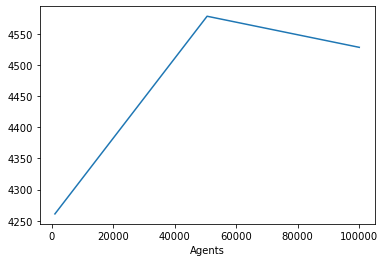

In [47]:
os.chdir("/home/peisenha/projects/structExpectations/development/templates")
rslt = pd.read_pickle("rslt-chatter.pkl")
rslt["Fval"].plot()

In [48]:
rslt

,Fval,Time
Agents,,
1000,4260.86,22.943
50500,4578.62,27.497
100000,4528.62,31.1665


In [36]:
import os
os.getcwd()

'/home/peisenha/external-storage/ownCloud/office/projects/structExpectations/development'

In [39]:

#!usr/bin/env python
import pickle
import time
import yaml
import sys
import os

import pandas as pd
import numpy as np

import sys
sys.path.insert(0, "../analysis/python")
from SimulationBasedEstimation import SimulationBasedEstimationCls



base_dir = os.getcwd()
os.chdir("/home/peisenha/projects/structExpectations/analysis/estimation/template-global-optimization")

sys.path.insert(0, ".")
from global_moments import get_moments

grid = np.linspace(1000, 2000, num=1, dtype=int)
rslt = pd.DataFrame(None, columns=["Fval", "Time"], index=grid)
rslt.index.name = "Agents"

base_spec = yaml.load(open("resources/model_spec_init.yml"), Loader=yaml.Loader)

for num_agents_sim in rslt.index.get_level_values("Agents"):
    base_spec["SIMULATION"]["num_agents_sim"] = num_agents_sim
    yaml.dump(base_spec, open('data.yml', "w"), default_flow_style=False)

    model_spec_fname = "data.yml"
    model_para_fname = "resources/model_params.pkl"

    weighting_matrix = pickle.load(open("resources/weighting_matrix_ones.pkl", "rb"))
    moments_obs = pickle.load(open("resources/moments_obs.pkl", "rb"))
    model_params = pd.read_pickle(model_para_fname)

    # We need to set up our criterion function.
    adapter_kwargs = dict()
    adapter_kwargs["model_spec_init_file_name"] = model_spec_fname
    adapter_kwargs["weighting_matrix"] = weighting_matrix
    adapter_kwargs["moments_obs"] = moments_obs
    adapter_kwargs["get_moments"] = get_moments
    adapter_kwargs["params"] = model_params

    adapter_smm = SimulationBasedEstimationCls(**adapter_kwargs)
    
    start = time.time()
    fval = adapter_smm.get_objective(model_params)
    finish = time.time()

    rslt.loc[num_agents_sim, "Time"] = finish-start   
    rslt.loc[num_agents_sim, "Fval"] = fval

    rslt.to_pickle(f"{base_dir}/rslt-chatter.pkl")

[-2.30684060e+00 -3.71110633e+00 -3.00896421e+00 -3.45947617e+00
 -4.57951977e+00 -3.33957347e+00 -5.24645074e+00 -3.86736651e+00
 -5.07906416e+00 -3.97137051e+00 -5.66190148e+00 -4.88311460e+00
 -5.53071846e+00 -4.09045001e+00 -5.93738353e+00 -3.89606060e+00
 -6.44463877e+00 -4.72500795e+00 -6.25019286e+00 -3.50060914e+00
 -6.48860806e+00 -5.50641887e+00 -7.06075124e+00 -4.36285267e+00
 -7.76510488e+00 -5.34464484e+00 -7.17208870e+00 -5.22938055e+00
 -7.37328189e+00 -6.28467414e+00 -7.20970362e+00 -4.59615934e+00
 -7.93948813e+00 -5.50473370e+00 -7.66008361e+00 -4.97414139e+00
 -6.63919166e+00 -3.81418427e+00 -8.05139118e+00 -5.54587574e+00
 -7.75189916e+00 -5.15219820e+00 -7.91871363e+00 -6.32230021e+00
 -7.97650807e+00 -4.87347016e+00 -8.03373215e+00 -6.05863088e+00
 -9.21282955e+00 -6.77277298e+00 -9.13079793e+00 -5.71831884e+00
 -1.02206857e+01 -6.44211629e+00 -1.04149227e+01 -6.86860132e+00
 -9.99429666e+00 -5.58410536e+00 -1.00273612e+01 -6.09463608e+00
 -1.18326509e+01 -6.20075

In [40]:
rslt

,Fval,Time
Agents,,
1000,4260.86,24.547705
